## Técnicas Estadísticas para Exploración de Datos

In [33]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

Como fase inicial de la analítica y de cualquier proceso de modelado, es necesario conocer y familiarizarse con las características de los datos disponibles, con el objetivo de determinar si la información se ajusta al problema planteado inicialmente y generar hipotesis del comportamiento. Existen diversas técnicas para explorar los datos, agrupadas en medidas numéricas como las medidas de localización o medidas de dispersión, y gráficas explicativas. En este tutorial se describen las preguntas más frecuentes a las que se enfrenta un modelador en cuanto a los datos y las posibles técnicas que ayudan a esclarecerlas.

## Definición del problema

El conjunto de datos de la flor Iris contiene 150 muestras de las medidas del ancho y el largo del pétalo y del sépalo para las tres especies de esta flor (Iris setosa, Iris virginica e Iris versicolor). A partir de la muestra de datos se desean responder las siguientes preguntas:

P1.— ¿Cuál es la longitud y ancho típicos del pétalo y del sépalo para cada uno de los tipos de flores?

P2.— ¿Cuál es el rango típico de la longitud y ancho del pétalo y del sépalo para cada uno de los tipos de flores?

P3.— ¿Qué relación existe entre el largo y el ancho del pétalo y el sépalo?

## Solución

In [2]:
##
## Preparación
##
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Lectura del archivo

In [5]:
##
## Lectura del archivo.
##
df = pd.read_csv("https://raw.githubusercontent.com/jdvelasq/datasets/master/iris.csv",
                 sep = ',',         # separador de campos
                 thousands = None,  # separador de miles para números
                 decimal = '.')     # separador de los decimales para números
df.head(11)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Se verifican los tipos de las columnas.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal_Length    150 non-null float64
Sepal_Width     150 non-null float64
Petal_Length    150 non-null float64
Petal_Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


## P1.— ¿Cuál es la longitud y ancho típicos del pétalo y del sépalo para cada uno de los tipos de flores?

$$x=\frac{1}{n}\sum_{i=1}^{n} x_{i}$$

In [7]:
df.mean()

Sepal_Length    5.843333
Sepal_Width     3.057333
Petal_Length    3.758000
Petal_Width     1.199333
dtype: float64

Se puede hacer una media agrupada.

In [8]:
df.groupby('Species').mean()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


## P2.— ¿Cuál es el rango típico de la longitud y ancho del pétalo y del sépalo para cada uno de los tipos de flores?

Esta pregunta hace referencia a una medida de dispersión o variabiilidad de los datos, y a como se distribuyen los datos

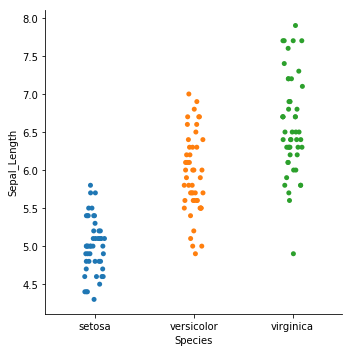

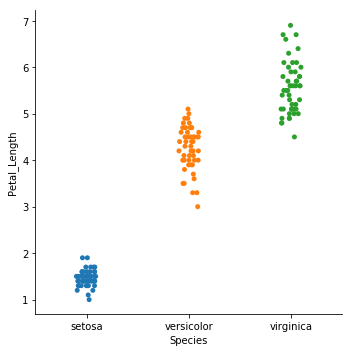

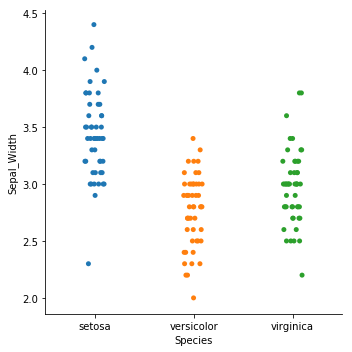

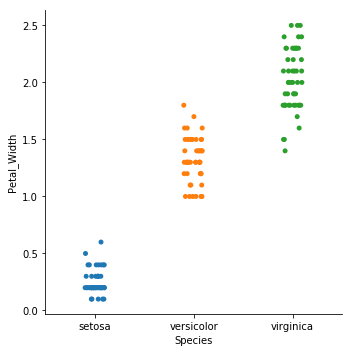

In [9]:
sns.catplot(x="Species", y="Sepal_Length", data=df)
sns.catplot(x="Species", y="Petal_Length", data=df)
sns.catplot(x="Species", y="Sepal_Width",  data=df)
sns.catplot(x="Species", y="Petal_Width",  data=df);

## Medidas de dispersión y variabilidad

**Desviación:** diferencia entre el valor observado y el valor estimado de localización. En modelado sus sinónimos son errores o residuales.

**Rango:** diferencia entre el valor más grande y más pequeño de la muestra de los datos.

In [10]:
df.max()

Sepal_Length          7.9
Sepal_Width           4.4
Petal_Length          6.9
Petal_Width           2.5
Species         virginica
dtype: object

In [11]:
df.min()

Sepal_Length       4.3
Sepal_Width          2
Petal_Length         1
Petal_Width        0.1
Species         setosa
dtype: object

In [12]:
df.groupby('Species').max()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Species,,,,
setosa,5.8,4.4,1.9,0.6
versicolor,7.0,3.4,5.1,1.8
virginica,7.9,3.8,6.9,2.5


Computa el rango

In [13]:
df._get_numeric_data().max() - df._get_numeric_data().min()

Sepal_Length    3.6
Sepal_Width     2.4
Petal_Length    5.9
Petal_Width     2.4
dtype: float64

In [14]:
df.select_dtypes('number').max() - df.select_dtypes('number').min()

Sepal_Length    3.6
Sepal_Width     2.4
Petal_Length    5.9
Petal_Width     2.4
dtype: float64

## Análisis de la distribución de los datos

Boxplot o diagrama de caja y bigotes: gráfico que representa la distribución de los datos. En la siguiente figura se presentan dichos diagramas para los datos que aparecen en el archivo muestra.csv. La caja central representa el rango intercuartil; la línea central en la caja corresponde a la mediana de los datos; los «bigotes» se extienden hasta el dato más lejano en cada dirección, sin supera 1.5 (u otro valor) veces el rango intercuartil. Los puntos representan valores en los datos que son más lejanos de 1.5 veces el rango intercuartil y podrían ser considerados outliers.

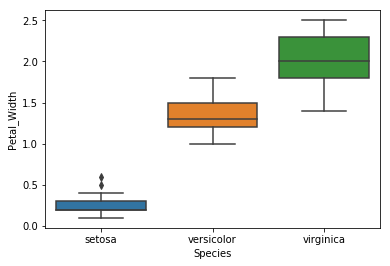

In [15]:
sns.boxplot(x='Species', y='Petal_Width', data=df);

**Diagrama de violin:** Diagrama similar a un boxplot pero muestra el estimado de la densidad de probabilidad.

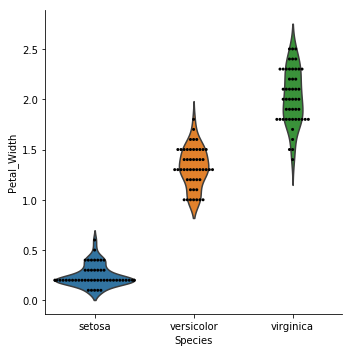

In [18]:
g = sns.catplot(x="Species", y="Petal_Width", kind="violin", inner=None, data=df);
sns.swarmplot(x="Species", y="Petal_Width", color="k", size=3, data=df, ax=g.ax);

**Histograma:** Es un diagrama que representa la cantidad de datos que contiene cada segmento en que se divide el rango de la variable analizada.

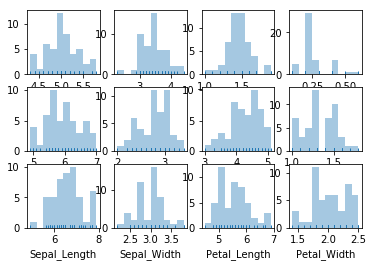

In [26]:
for i,(key,group) in enumerate(df.groupby('Species')):
    for j,col in enumerate(df._get_numeric_data().columns):
        #plt.figure(figsize = (15,10))
        plt.subplot(3, 4, 4*i+j+1)
        sns.distplot(group[col], kde=False, bins=10, rug=True, hist_kws={'alpha': 0.4});

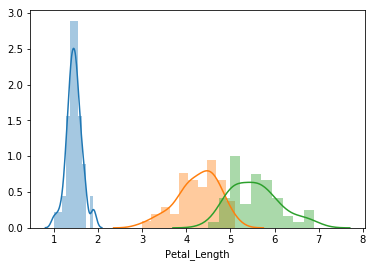

In [27]:
for key,group in df.groupby('Species'):
    sns.distplot(group['Petal_Length'],  bins=10, hist_kws={'alpha': 0.4});

## P3.— ¿Qué relación existe entre el largo y el ancho del pétalo y el sépalo?

**Relaciones entre dos o más variables**

 Diagrama de dispersión: Gráfico en que en el eje $X$ corresponde a una variable, mientras que el eje $Y$ corresponde a otra.    Se usa para visualizar relaciones de dependencia.

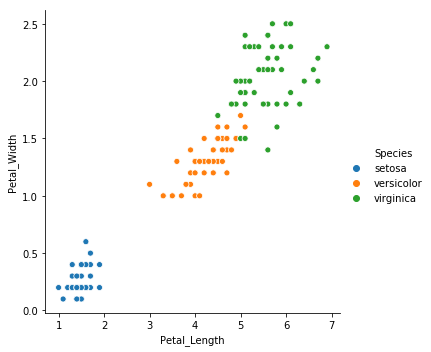

In [28]:
sns.relplot(x="Petal_Length", y="Petal_Width", hue="Species", data=df);

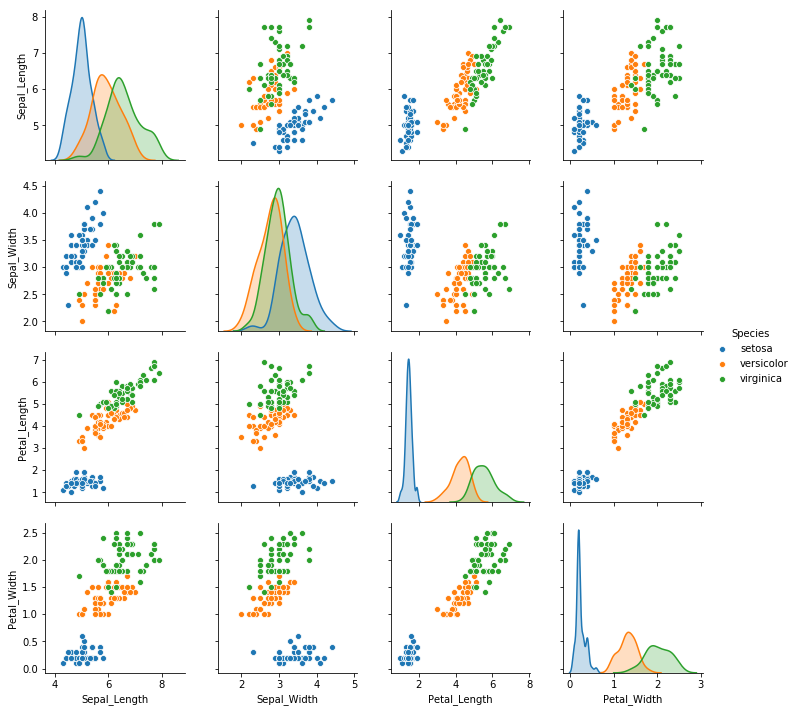

In [29]:
sns.pairplot(df, hue="Species");

**Gráfico de hexágonos (hexagonal binning plot):** Cuando los diagramas de dispersión contienen muchos datos se hacen demasiado densos impidiendo la visualización. En este caso, el espacio $X-Y$ del gráfico es dividido en hexágonos que cuentan la cantidad de puntos que caen en ellos; en este gráfico, el color de cada hexágono representa la cantidad de puntos en él (un ejemplo es presentado aquí).

### Matriz de correlación

**Matriz de correlación:** Matriz donde cada fila y cada columna corresponde a una variable, y los elementos corresponden a la correlación entre las respectivas variables.

In [30]:
df.corr()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.000000,-0.117570,0.871754,0.817941
Sepal_Width,-0.117570,1.000000,-0.428440,-0.366126
Petal_Length,0.871754,-0.428440,1.000000,0.962865
Petal_Width,0.817941,-0.366126,0.962865,1.000000


El mapa de calor es mas representativo.

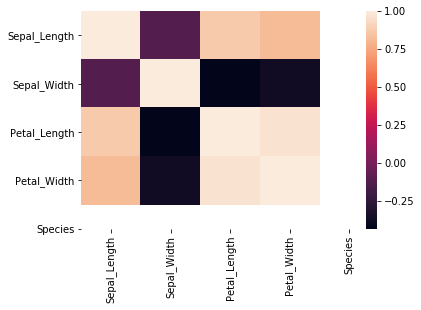

In [31]:
sns.heatmap(df.corr(),
            xticklabels=df.columns.values,
            yticklabels=df.columns.values);

# Análisis de publicaciones sobre analytics y big data en Scopus